In [1]:
import sys
import os
if os.pardir not in sys.path:
    sys.path.append(os.pardir)

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from reuters_data import read_reuters_data
import util

Using TensorFlow backend.


In [3]:
reuters_data = read_reuters_data(num_words=10000, validation_size=1000)

In [4]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(reuters_data.train.data, reuters_data.train.labels, epochs=20, batch_size=512, 
                    validation_data=(reuters_data.validation.data, reuters_data.validation.labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 421us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 129us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 128us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


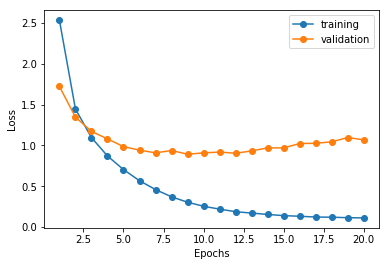

In [6]:
util.plot_history(history.history['loss'], history.history['val_loss'], ylabel='Loss')

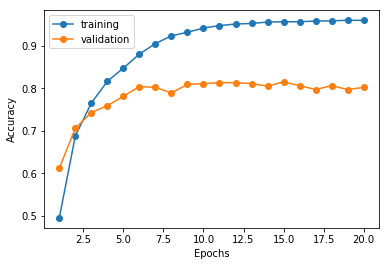

In [7]:
util.plot_history(history.history['acc'], history.history['val_acc'], ylabel='Accuracy')

In [8]:
reuters_data = read_reuters_data(num_words=10000, validation_size=0)

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(reuters_data.train.data, reuters_data.train.labels, epochs=5, batch_size=512)

Epoch 1/5
8982/8982 [==============================] - 1s 155us/step - loss: 0.2302 - acc: 0.9402
Epoch 2/5
8982/8982 [==============================] - 1s 114us/step - loss: 0.1630 - acc: 0.9476
Epoch 3/5
8982/8982 [==============================] - 1s 114us/step - loss: 0.1435 - acc: 0.9522
Epoch 4/5
8982/8982 [==============================] - 1s 117us/step - loss: 0.1321 - acc: 0.9538
Epoch 5/5
8982/8982 [==============================] - 1s 116us/step - loss: 0.1210 - acc: 0.9561


In [10]:
model.evaluate(reuters_data.test.data, reuters_data.test.labels)

2246/2246 [==============================] - 0s 186us/step


[1.2866308243276812, 0.778272484443279]

In [11]:
predict = model.predict(reuters_data.test.data)
print("predict: {}, ground truth: {}".format(np.argmax(predict[1]), np.argmax(reuters_data.test.labels[1])))

predict: 10, ground truth: 10
